In [193]:
# DECISION TREE:

In [194]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [195]:
# 1. Data Preparation:

In [196]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [197]:
# 2. Exploratory Data Analysis (EDA):

In [198]:
# Data Dictionary:
# age:	    Age in years
# Gender:	    Gender ; Male - 1, Female -0
# cp:	        Chest pain type
# trestbps:	Resting blood pressure
# chol:	    cholesterol measure
# fbs:	    (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg:	"ecg observation at resting condition,   
#              -- Value 0: normal
#              -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#              -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
# thalch:	    maximum heart rate achieved
# exang:	    exercise induced angina
# oldpeak:	    ST depression induced by exercise relative to rest
# slope:	    the slope of the peak exercise ST segment
# thal:	    Thal
# num:	    target [0=no heart disease; 1,2,3,4 = stages of heart disease]

In [199]:
df.shape

(908, 13)

In [200]:
# Summary Statistics:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


In [201]:
# Checking for missing values:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [202]:
print(np.mean(df.oldpeak))

0.8912529550827422


<function matplotlib.pyplot.show(close=None, block=None)>

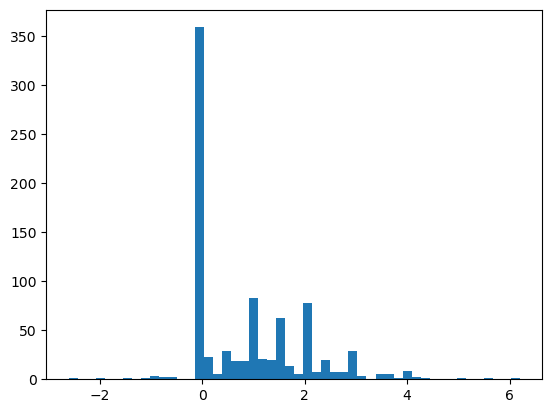

In [203]:
# Plotting distribution to see what value we can fill with:
plt.hist(df.oldpeak, bins=50)
plt.show

In [204]:
# Mode is 0
df.oldpeak.value_counts().head()

oldpeak
0.0    358
1.0     83
2.0     76
1.5     48
3.0     28
Name: count, dtype: int64

In [205]:
# We can fill with mode:
df['oldpeak']=df['oldpeak'].fillna(value=0.0)

In [206]:
# We have imputed all the missing values:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [207]:
df.info()
# dtypes: bool(1), float64(1), int64(5), object(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [208]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

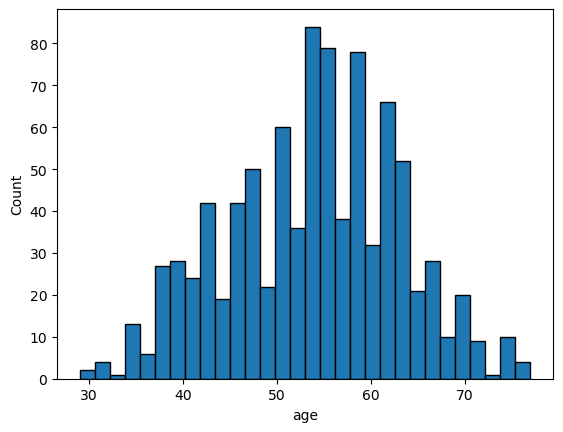

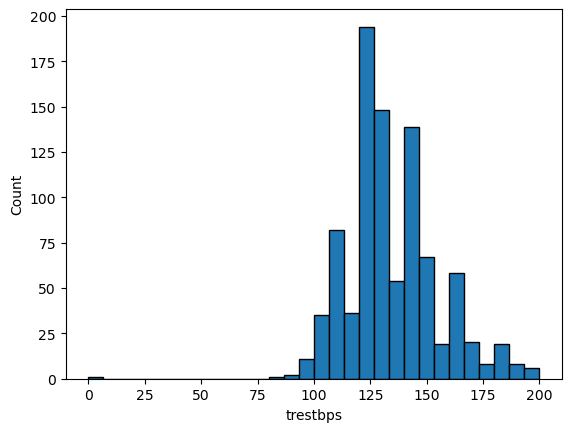

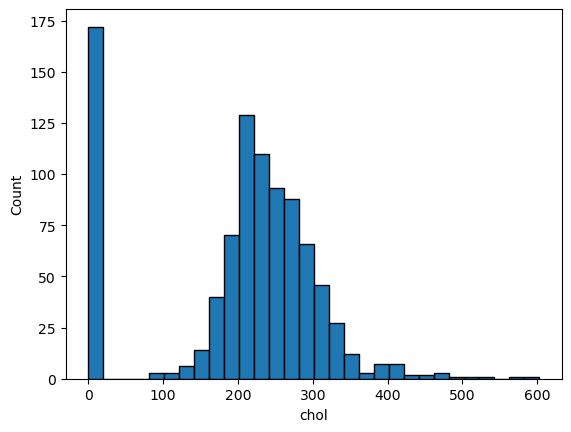

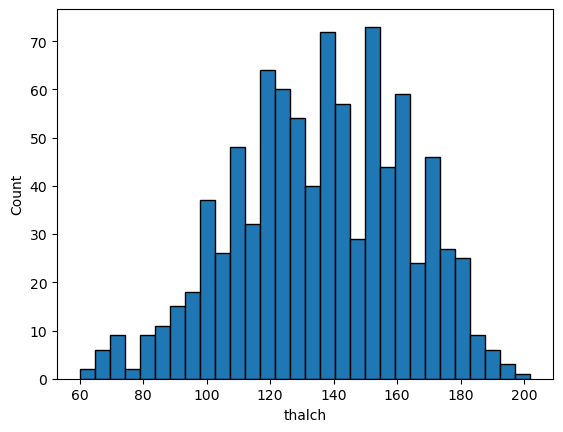

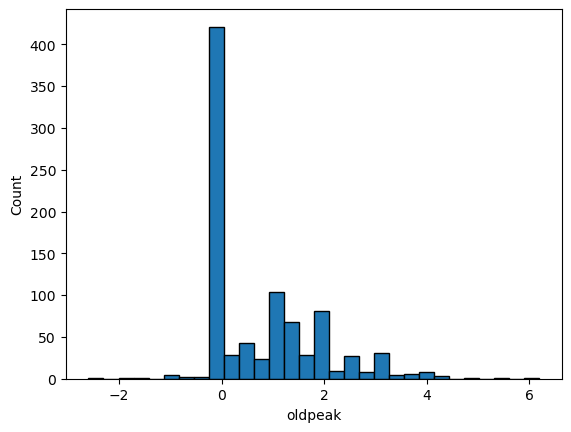

In [209]:
#Histplots for all the numerical variables:
for i in ['age','trestbps','chol','thalch','oldpeak']:
    plt.hist(df[i],edgecolor='black',bins=30)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.show()

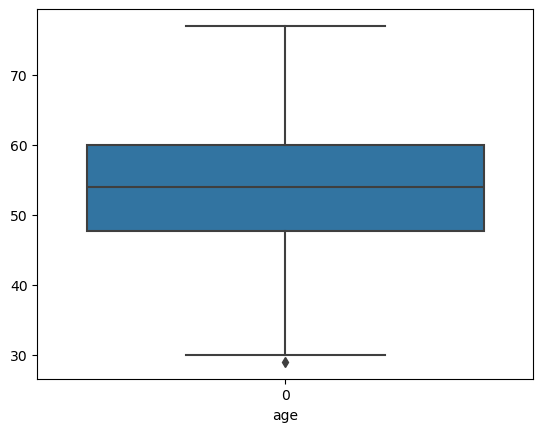

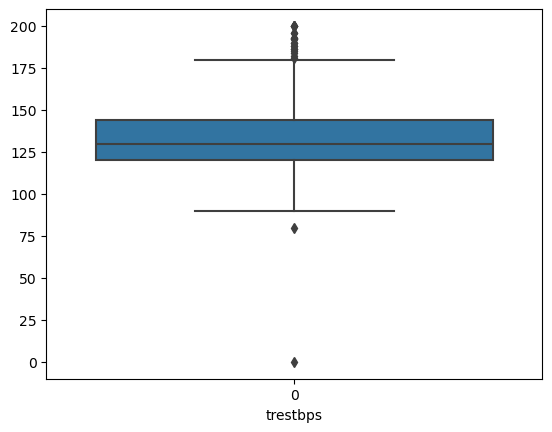

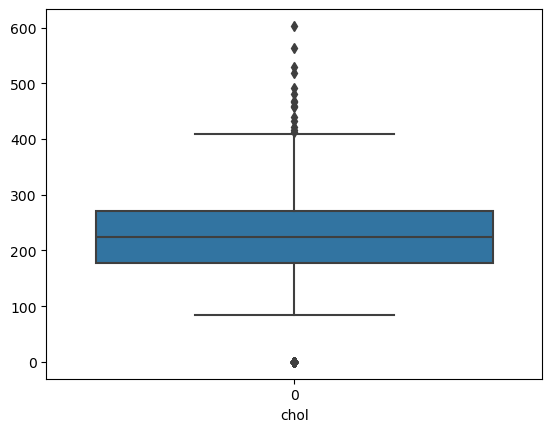

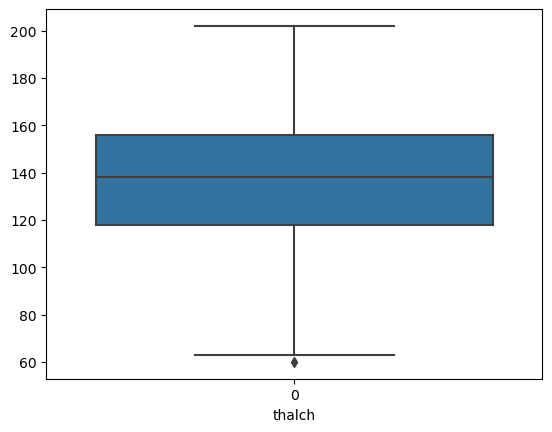

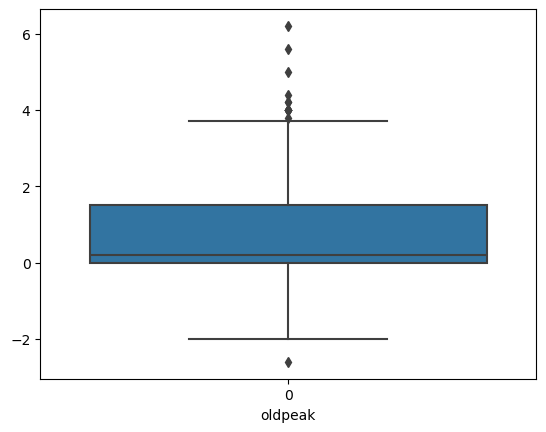

In [210]:
# Boxplots for all the numerical variables: To find outliers:
for i in ['age','trestbps','chol','thalch','oldpeak']:
    sns.boxplot(df[i])
    plt.xlabel(f'{i}')
    plt.show() 

In [211]:
# 3. Feature Engineering:

In [212]:
# splitting data into cat and numerical:
catdf=df[['sex','cp','fbs','restecg','exang','slope','thal','num']]
catdf.head()

,sex,cp,fbs,restecg,exang,slope,thal,num
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect,0
1,Male,atypical angina,False,normal,False,flat,fixed defect,0
2,Male,asymptomatic,False,normal,False,flat,fixed defect,0
3,Male,typical angina,False,lv hypertrophy,False,flat,fixed defect,0
4,Male,asymptomatic,False,normal,True,flat,fixed defect,0


In [213]:
numdf=df[['age','trestbps','chol','thalch','oldpeak']]
numdf.head()

,age,trestbps,chol,thalch,oldpeak
0,63,145,233,150,2.3
1,41,135,203,132,0.0
2,57,140,192,148,0.4
3,52,118,186,190,0.0
4,57,110,201,126,1.5


<Axes: >

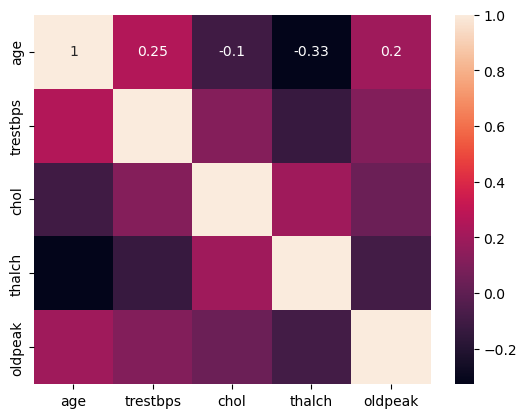

In [214]:
# Builing Correlation Matrix
# Finding Correlation between different variables
sns.heatmap(numdf.corr(),annot=True)

In [215]:
# We can see that few values are misspelt:
catdf.exang.value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

In [216]:
# Normalize the column values by stripping whitespace and converting to lower case
catdf['exang'] = catdf['exang'].astype(str).str.strip().str.lower()

# Replace 'ture' with 'true' and 'false' with 'false'
catdf['exang'] = catdf['exang'].replace({'ture': 'true', 'false': 'false'})

# Convert strings back to boolean
catdf['exang'] = catdf['exang'].map({'false': False, 'true': True})

C:\Users\subha\AppData\Local\Temp\ipykernel_15072\2705362597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catdf['exang'] = catdf['exang'].astype(str).str.strip().str.lower()
C:\Users\subha\AppData\Local\Temp\ipykernel_15072\2705362597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catdf['exang'] = catdf['exang'].replace({'ture': 'true', 'false': 'false'})
C:\Users\subha\AppData\Local\Temp\ipykernel_15072\2705362597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [217]:
# corrected column:
catdf.exang.value_counts()

exang
False    535
True     373
Name: count, dtype: int64

In [218]:
# changing boolean to num value:
catdf["fbs"] = catdf["fbs"].astype(int)
catdf["exang"] = catdf["exang"].astype(int)
catdf.head()

C:\Users\subha\AppData\Local\Temp\ipykernel_15072\3826370855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catdf["fbs"] = catdf["fbs"].astype(int)
C:\Users\subha\AppData\Local\Temp\ipykernel_15072\3826370855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catdf["exang"] = catdf["exang"].astype(int)


,sex,cp,fbs,restecg,exang,slope,thal,num
0,Male,typical angina,1,lv hypertrophy,0,downsloping,fixed defect,0
1,Male,atypical angina,0,normal,0,flat,fixed defect,0
2,Male,asymptomatic,0,normal,0,flat,fixed defect,0
3,Male,typical angina,0,lv hypertrophy,0,flat,fixed defect,0
4,Male,asymptomatic,0,normal,1,flat,fixed defect,0


In [219]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [220]:
# Encoding:
catdf['en_sex']=le.fit_transform(catdf['sex'])
catdf['en_cp']=le.fit_transform(catdf['cp'])
catdf['en_restecg']=le.fit_transform(catdf['restecg'])
catdf['en_slope']=le.fit_transform(catdf['slope'])
catdf['en_thal']=le.fit_transform(catdf['thal'])

C:\Users\subha\AppData\Local\Temp\ipykernel_15072\3704152930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catdf['en_sex']=le.fit_transform(catdf['sex'])
C:\Users\subha\AppData\Local\Temp\ipykernel_15072\3704152930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catdf['en_cp']=le.fit_transform(catdf['cp'])
C:\Users\subha\AppData\Local\Temp\ipykernel_15072\3704152930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [221]:
catdf.head()

,sex,cp,fbs,restecg,exang,slope,thal,num,en_sex,en_cp,en_restecg,en_slope,en_thal
0,Male,typical angina,1,lv hypertrophy,0,downsloping,fixed defect,0,1,3,0,0,0
1,Male,atypical angina,0,normal,0,flat,fixed defect,0,1,1,1,1,0
2,Male,asymptomatic,0,normal,0,flat,fixed defect,0,1,0,1,1,0
3,Male,typical angina,0,lv hypertrophy,0,flat,fixed defect,0,1,3,0,1,0
4,Male,asymptomatic,0,normal,1,flat,fixed defect,0,1,0,1,1,0


In [222]:
catdf=catdf.drop(['sex','cp','restecg','slope','thal'],axis='columns')
catdf.head()

,fbs,exang,num,en_sex,en_cp,en_restecg,en_slope,en_thal
0,1,0,0,1,3,0,0,0
1,0,0,0,1,1,1,1,0
2,0,0,0,1,0,1,1,0
3,0,0,0,1,3,0,1,0
4,0,1,0,1,0,1,1,0


In [223]:
# Final encoded catdf:
catdf.rename(columns={'num': 'cancer_stage'}, inplace=True)
catdf.head()

,fbs,exang,cancer_stage,en_sex,en_cp,en_restecg,en_slope,en_thal
0,1,0,0,1,3,0,0,0
1,0,0,0,1,1,1,1,0
2,0,0,0,1,0,1,1,0
3,0,0,0,1,3,0,1,0
4,0,1,0,1,0,1,1,0


In [224]:
numdf.head()

,age,trestbps,chol,thalch,oldpeak
0,63,145,233,150,2.3
1,41,135,203,132,0.0
2,57,140,192,148,0.4
3,52,118,186,190,0.0
4,57,110,201,126,1.5


In [225]:
# Using MinMaxScaler to normalize the numerical data 
from sklearn.preprocessing import MinMaxScaler

In [226]:
mmsc=MinMaxScaler()
mmsc.fit(numdf)

MinMaxScaler()

In [227]:
# Final normalized scalednumdf
scalednum=mmsc.transform(numdf)
scalednumdf=pd.DataFrame(scalednum,columns=numdf.columns)
scalednumdf.head()

,age,trestbps,chol,thalch,oldpeak
0,0.708333,0.725,0.386401,0.633803,0.556818
1,0.250000,0.675,0.336650,0.507042,0.295455
2,0.583333,0.700,0.318408,0.619718,0.340909
3,0.479167,0.590,0.308458,0.915493,0.295455
4,0.583333,0.550,0.333333,0.464789,0.465909


In [228]:
# Both numerical columns and cat columns are ML model ready now
# We concat both of them for final df
finaldf=pd.concat([scalednumdf,catdf],axis='columns')
finaldf.head()

,age,trestbps,chol,thalch,oldpeak,fbs,exang,cancer_stage,en_sex,en_cp,en_restecg,en_slope,en_thal
0,0.708333,0.725,0.386401,0.633803,0.556818,1,0,0,1,3,0,0,0
1,0.250000,0.675,0.336650,0.507042,0.295455,0,0,0,1,1,1,1,0
2,0.583333,0.700,0.318408,0.619718,0.340909,0,0,0,1,0,1,1,0
3,0.479167,0.590,0.308458,0.915493,0.295455,0,0,0,1,3,0,1,0
4,0.583333,0.550,0.333333,0.464789,0.465909,0,1,0,1,0,1,1,0


In [229]:
# 4. Decision Tree Classification:

In [230]:
# Building the model
x=finaldf[['age','trestbps','chol','thalch','oldpeak','fbs','exang','en_sex','en_cp','en_restecg','en_slope','en_thal']]
y=finaldf['cancer_stage']

In [231]:
# Splitting the dataset into the Training set and Test set using 80:20 split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,random_state=30)

In [232]:
# Fitting Training set to decision tree
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier()
tree1.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [233]:
ypred=tree1.predict(xtest)
print(ypred)

[0 1 0 0 1 0 2 1 0 0 1 4 2 1 1 3 3 3 2 1 1 1 1 0 0 0 3 2 1 3 2 1 2 0 0 0 3
 3 2 3 2 1 2 0 1 0 3 3 0 4 2 0 0 0 0 1 0 1 0 0 0 0 1 0 0 4 1 0 1 0 1 4 0 1
 0 1 4 3 2 1 0 1 1 1 0 0 0 1 1 0 2 1 2 0 0 2 1 3 1 1 2 0 0 3 2 0 2 0 0 1 0
 2 0 0 2 1 1 2 2 0 3 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 2 2 3 0 2 0 3 0 2 2 3 0
 1 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 3 0 3 3 1 3 0 0 3 3 1 0 0]


In [234]:
# Metrics testing:

In [235]:
# Accuracy Score:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.46703296703296704

In [236]:
# Precision Score:
from sklearn.metrics import precision_score
precision_score(ytest, ypred, average='micro')

0.46703296703296704

In [237]:
# Recall Score:
from sklearn.metrics import recall_score
recall_score(ytest, ypred, average='micro')

0.46703296703296704

In [238]:
# F1 Score:
from sklearn.metrics import f1_score
f1_score(ytest, ypred, average='weighted')

0.464134440254524

In [239]:
# ROC-AUC Score:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear").fit(x, y)
roc_auc_score(y, clf.predict_proba(x), multi_class='ovr')

0.7850782249725023

In [240]:
# 5. Hyperparameter Tuning: using gridsearchcv

In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
hypara={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,None],
    'min_samples_split':[2,3,4,5,6,7]
}

In [243]:
grid=GridSearchCV(tree1,param_grid=hypara,cv=10,n_jobs=-1)

In [244]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [245]:
# best model score for the best params:
grid.best_score_

0.5619482496194825

In [246]:
# best parameters:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4}

In [247]:
# New model using best params:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=6)
tree2.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_split=6)

In [248]:
ypred2=tree2.predict(xtest)
print(ypred2)

[1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 3 3 2 1 1 1 1 1 0 0 1 4 1 3 1 0 1 1 0 0 3
 1 4 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 3 1 0 1 0 3 1 0 1
 0 0 1 1 3 0 0 1 0 1 1 3 0 0 1 0 1 0 0 0 0 0 0 3 0 1 1 0 0 1 3 0 0 0 0 1 0
 0 0 0 1 1 0 1 3 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 2 0 3 0 4 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0]


In [249]:
# F1 Score: Higher score compared to model before hypertuning
from sklearn.metrics import f1_score
f1_score(ytest, ypred2, average='weighted')

0.5049268117304061

In [250]:
# Accuracy Score: Higher accuracy compared to model before hypertuning
accuracy_score(ytest, ypred2)

0.554945054945055

In [251]:
# 6. Model Evaluation and Analysis:

In [252]:
# Visualizing the decision tree:
from sklearn import tree

[Text(0.583003321410322, 0.9705882352941176, 'x[8] <= 0.5\ngini = 0.689\nsamples = 726\nvalue = [327.0, 205.0, 87.0, 82.0, 25.0]'),
 Text(0.3519736842105263, 0.9117647058823529, 'x[6] <= 0.5\ngini = 0.741\nsamples = 396\nvalue = [88, 153, 71, 64, 20]'),
 Text(0.46748850281042414, 0.9411764705882353, 'True  '),
 Text(0.11695196729688298, 0.8529411764705882, 'x[2] <= 0.107\ngini = 0.729\nsamples = 158\nvalue = [58.0, 48.0, 28.0, 15.0, 9.0]'),
 Text(0.028359734287174247, 0.7941176470588235, 'x[3] <= 0.317\ngini = 0.712\nsamples = 44\nvalue = [3.0, 15.0, 16.0, 8.0, 2.0]'),
 Text(0.016351558507920288, 0.7352941176470589, 'x[0] <= 0.583\ngini = 0.625\nsamples = 8\nvalue = [0, 0, 2, 4, 2]'),
 Text(0.012263668880940215, 0.6764705882352942, 'x[1] <= 0.65\ngini = 0.64\nsamples = 5\nvalue = [0, 0, 2, 1, 2]'),
 Text(0.008175779253960144, 0.6176470588235294, 'x[3] <= 0.268\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 1, 2]'),
 Text(0.004087889626980072, 0.5588235294117647, 'gini = 0.0\nsamples = 2

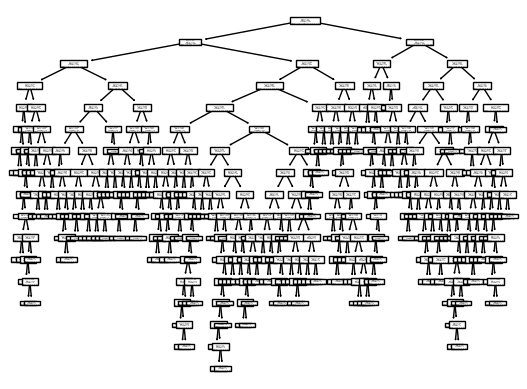

In [253]:
tree.plot_tree(tree1)

[Text(0.5, 0.9, 'x[8] <= 0.5\ngini = 0.689\nsamples = 726\nvalue = [327.0, 205.0, 87.0, 82.0, 25.0]'),
 Text(0.25, 0.7, 'x[6] <= 0.5\ngini = 0.741\nsamples = 396\nvalue = [88, 153, 71, 64, 20]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[2] <= 0.107\ngini = 0.729\nsamples = 158\nvalue = [58.0, 48.0, 28.0, 15.0, 9.0]'),
 Text(0.0625, 0.3, 'x[3] <= 0.317\ngini = 0.712\nsamples = 44\nvalue = [3.0, 15.0, 16.0, 8.0, 2.0]'),
 Text(0.03125, 0.1, 'gini = 0.625\nsamples = 8\nvalue = [0, 0, 2, 4, 2]'),
 Text(0.09375, 0.1, 'gini = 0.656\nsamples = 36\nvalue = [3, 15, 14, 4, 0]'),
 Text(0.1875, 0.3, 'x[11] <= 1.5\ngini = 0.665\nsamples = 114\nvalue = [55, 33, 12, 7, 7]'),
 Text(0.15625, 0.1, 'gini = 0.544\nsamples = 79\nvalue = [49, 20, 6, 2, 2]'),
 Text(0.21875, 0.1, 'gini = 0.762\nsamples = 35\nvalue = [6, 13, 6, 5, 5]'),
 Text(0.375, 0.5, 'x[0] <= 0.698\ngini = 0.712\nsamples = 238\nvalue = [30, 105, 43, 49, 11]'),
 Text(0.3125, 0.3, 'x[4] <= 0.653\ngini = 0.681\nsamples = 186\nvalue = 

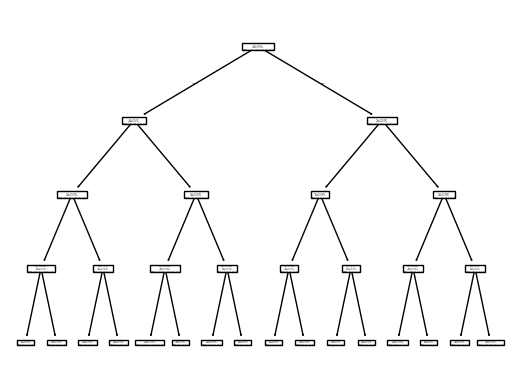

In [254]:
tree.plot_tree(tree2)

In [255]:
tree2.score(xtrain,ytrain)

0.6267217630853994

In [256]:
# Conclustion:
# performed all the tasks and built different models to find the optimal model to predict cancer_stage in a patient